# INTRODUCTION

**PROBLEM STATEMENT: Spam Detection Using machine Learing Model**

<font size="3">Develop a machine learning model to accuratly classify incoming emails as either legithmate (ham) or spam </font>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Loading Dataset**

In [2]:
data = pd.read_csv(r"C:\Users\solomon\Downloads\dataset\spam.csv", encoding="latin-1")

**Cleaning Data**

In [3]:
data.drop([data.columns[col] for col in [2,3,4]],axis = 1,inplace = True)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data["v1"] = encode.fit_transform(data["v1"])

In [6]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
len(data)

5572

**Encoding the target column**

In [ ]:
class_mapping = {index: label for index,label in enumerate(encode.classes_)}

In [9]:
class_mapping

{0: 'ham', 1: 'spam'}

**Preprocessing**

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [11]:
#Take a mail string and convert it to a list of stemed word
corpus = []
ps = PorterStemmer()
for i in range (0,len(data)):
    contents = re.sub(r'[^a-zA-Z0-9]', ' ',data["v2"][i])
    contents = contents.lower()
    contents = re.sub(r"@[^\s]+"," ", contents)
    contents = re.sub(r"[0-9]+", "number", contents)
    contents = re.sub(r"(http|https)://[^\s]+", "httpaddr", contents)
    contents = re.sub(r"[$]+", "dollar", contents)
    contents = re.sub(r"[^\s]+@[^\s]+","emailaddr", contents)
    contents = re.sub(r"#\S+", " ",contents)
    contents = contents.split()
    contents = [ps.stem(word) for word in contents if not word in set(stopwords.words("english"))]
    contents = " ".join(contents)
    corpus.append(contents)
    

In [12]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri number wkli comp win fa cup final tkt numberst may number text fa number receiv entri question std txt rate c appli numberovernumb',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl number week word back like fun still tb ok xxx std chg send number number rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press number copi friend callertun',
 'winner valu network custom select receivea number prize reward claim call number claim code klnumber valid number hour',
 'mobil number month u r entitl updat latest colour mobil camera free call mobil updat co free number',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash number number number pound txt cshnumber send number cost numberp day numberday num

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv =TfidfVectorizer()
X = tv.fit_transform(corpus).toarray()

In [14]:
y = data["v1"].values

**Preparing the data for training and testing the model**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=0)

In [16]:
from xgboost import XGBRFClassifier
classifier = XGBRFClassifier()
classifier = classifier.fit(X_train,y_train)

In [17]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)

**Model Evaluation**

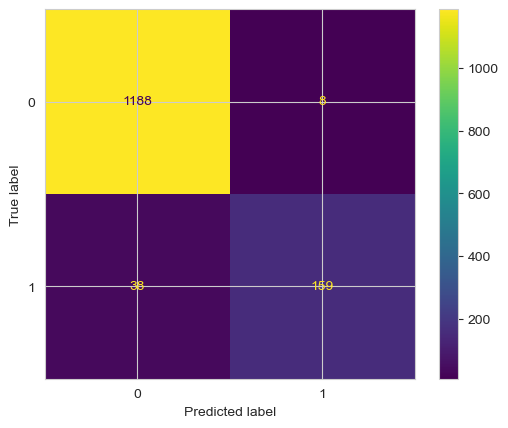

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()